<a href="https://colab.research.google.com/github/Sachinsachin21/Deep_learning/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
m = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = m.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train, X_test

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


In [ ]:
m1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
m1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opti = keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
m1.compile(optimizer=opti, loss=loss, metrics=metrics)

In [ ]:
batch_size = 64
epochs = 5

In [ ]:
m1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,shuffle=True,verbose=2)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 - 2s - loss: 0.2949 - accuracy: 0.9162 - 2s/epoch - 2ms/step
Epoch 2/5
938/938 - 2s - loss: 0.1362 - accuracy: 0.9603 - 2s/epoch - 3ms/step
Epoch 3/5
938/938 - 2s - loss: 0.0959 - accuracy: 0.9714 - 2s/epoch - 2ms/step
Epoch 4/5
938/938 - 3s - loss: 0.0717 - accuracy: 0.9788 - 3s/epoch - 3ms/step
Epoch 5/5
938/938 - 3s - loss: 0.0565 - accuracy: 0.9835 - 3s/epoch - 4ms/step


In [ ]:
m1.evaluate(X_test, y_test,batch_size=batch_size,verbose=2)

157/157 - 0s - loss: 0.0864 - accuracy: 0.9745 - 434ms/epoch - 3ms/step


[0.08635054528713226, 0.9745000004768372]

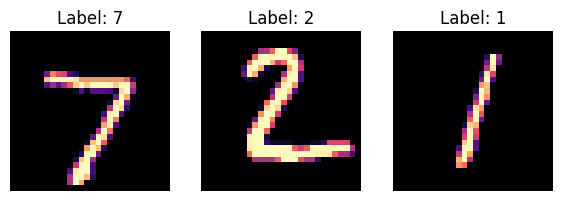

In [ ]:
plt.figure(figsize=(7, 3))
for i in range(3):
    plt.subplot(1,3, i + 1)
    plt.imshow(X_test[i], cmap='magma')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.show()

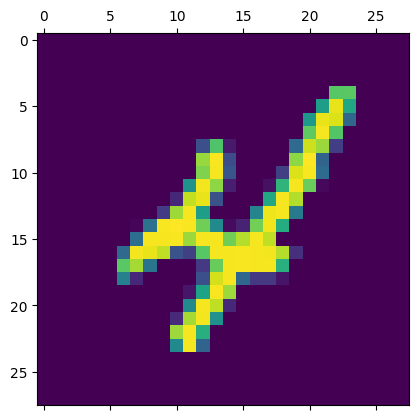

In [ ]:
plt.matshow(X_train[9])